<a href="https://colab.research.google.com/github/Angepira/AngePira.github.io/blob/main/Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aprendizaje Supervisado: Regresión Linear simple

**Objetivo**

A partir del dataset de artículos de machine learning vamos a tratar de predecir, cuantas
veces será compartido un artículo por redes sociales

La ecuación de una recta es:

\begin{align}
\mathbf{y} = \ mx + b
\end{align}

Donde:
- $y$ es el valor de la variable dependiente *(lo que estamos prediciendo en el modelo)*
- $x$ es el valor de la variable independiente *(los features)*
- $m$ es la pendiente de la recta
- $b$ es el intercepto de la recta

## Importamos librerías

In [ ]:
#Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Exploración inicial

In [ ]:
#Cargamos el archivo desde link
#El archivo se llama 'articulos_ml.csv'
url = "https://drive.google.com/file/d/1YA7QUoPKoxHXsFw3odslhsI2-Vw6bBMe/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [ ]:
#Leamos el dataset y veamos las primeras filas
data = pd.read_csv(path)
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [ ]:
#Miremos el tañamo (filas, columnas)
data.shape

(161, 8)

In [ ]:
#Mirmos las estadísticas de las variables numéricas
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


In [ ]:
#Mirmos las estadísticas de las variables categoricas
data.describe(include=['O'])

,Title,url
count,161,122
unique,161,121
top,What is Machine Learning and how do we use it ...,https://www.analyticsvidhya.com/blog/2017/05/p...
freq,1,2


In [ ]:
#Miremos la info del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           161 non-null    object 
 1   url             122 non-null    object 
 2   Word count      161 non-null    int64  
 3   # of Links      161 non-null    int64  
 4   # of comments   129 non-null    float64
 5   # Images video  161 non-null    int64  
 6   Elapsed days    161 non-null    int64  
 7   # Shares        161 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 10.2+ KB


In [ ]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


<ipython-input-50-053223cc9d89>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['Title', 'url','Elapsed days'],1).hist()


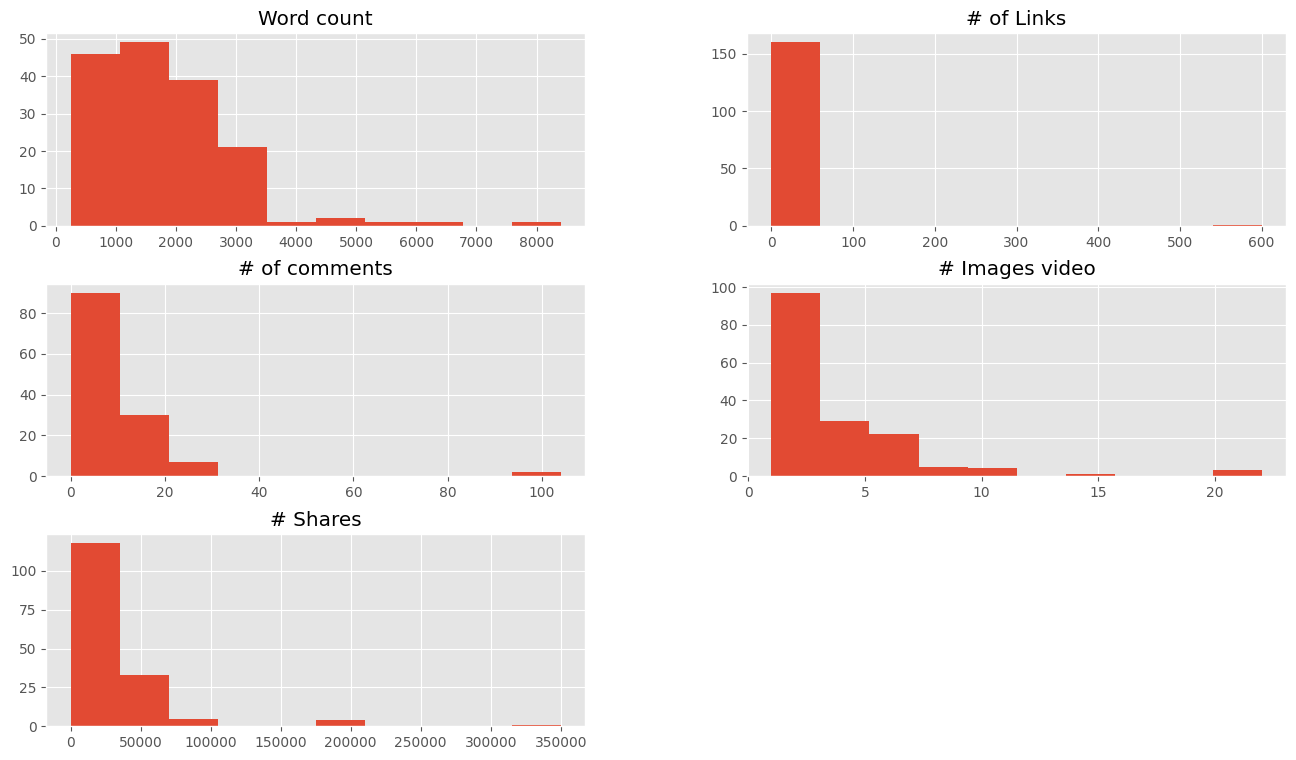

In [ ]:
#Miremos la distribución de las variables que pensamos para el modelo
data.drop(['Title', 'url','Elapsed days'],1).hist()
plt.show();

## Limpiamos los datos

In [ ]:
#Cortemos los datos donde se concentran más los puntos
data_filtrada = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

Vamos a graficar los registros y revisar cuales tienen la cantidad de palabras por encima de la media

In [ ]:
media_palabras = data['Word count'].mean()

In [ ]:
media_palabras

1808.2608695652175

###Gráfica con seaborn

<Axes: xlabel='Word count', ylabel='# Shares'>

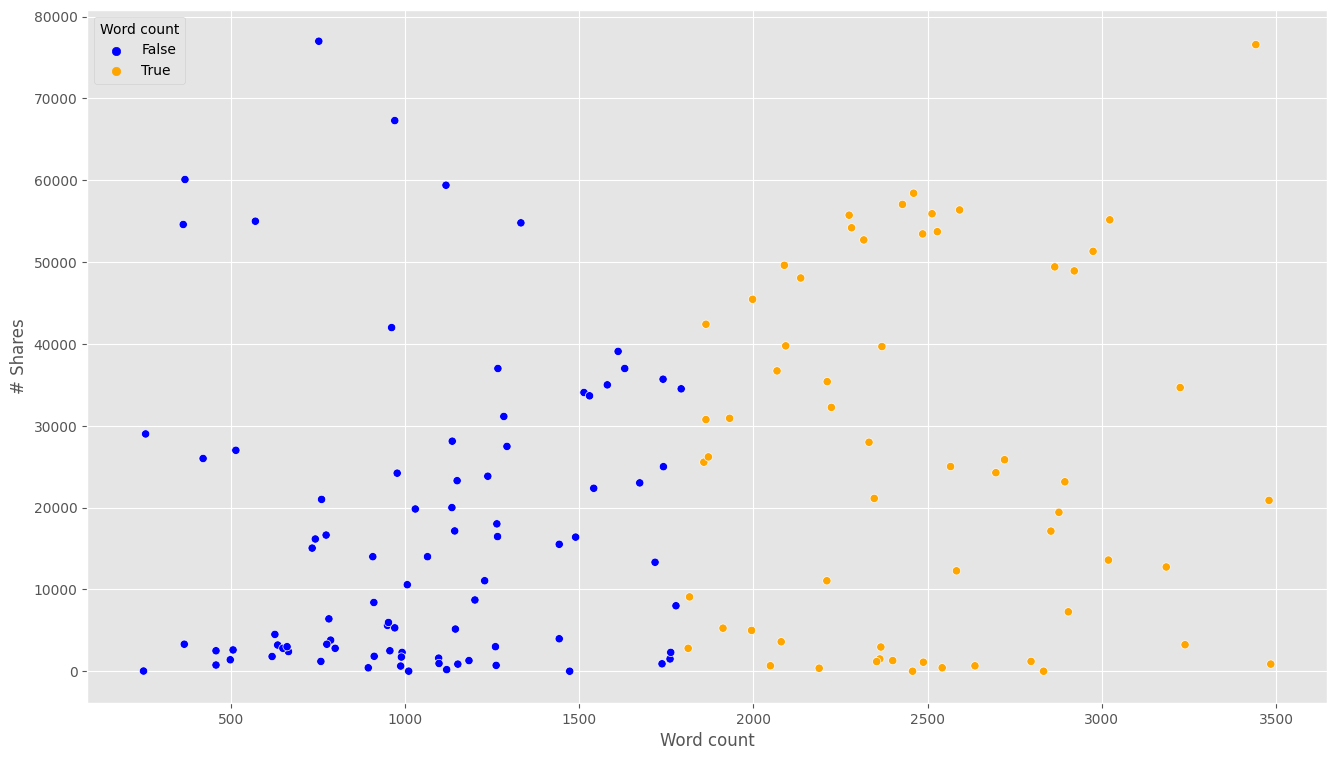

In [ ]:
# Configurar colores para los puntos
palette = {True: 'orange', False: 'blue'}

# Graficar el scatterplot con los colores personalizados
sns.scatterplot(data=data_filtrada, x='Word count', y='# Shares', hue=data_filtrada['Word count'] > media_palabras, palette=palette)

###Gráfica con matplotlib

In [ ]:
#Configuramos los datos para la gráfica
colores = ['orange','blue']
tamanos = [30,60]

f1 = data_filtrada['Word count'].values
f2 = data_filtrada['# Shares'].values


In [ ]:
#Pintamos en colores los puntos por debajo y por encima de la media de la cantidad de palabras
asignar = []

for index, row in data_filtrada.iterrows():
  if row['Word count'] > media_palabras:
    asignar.append(colores[0])
  else:
    asignar.append(colores[1])

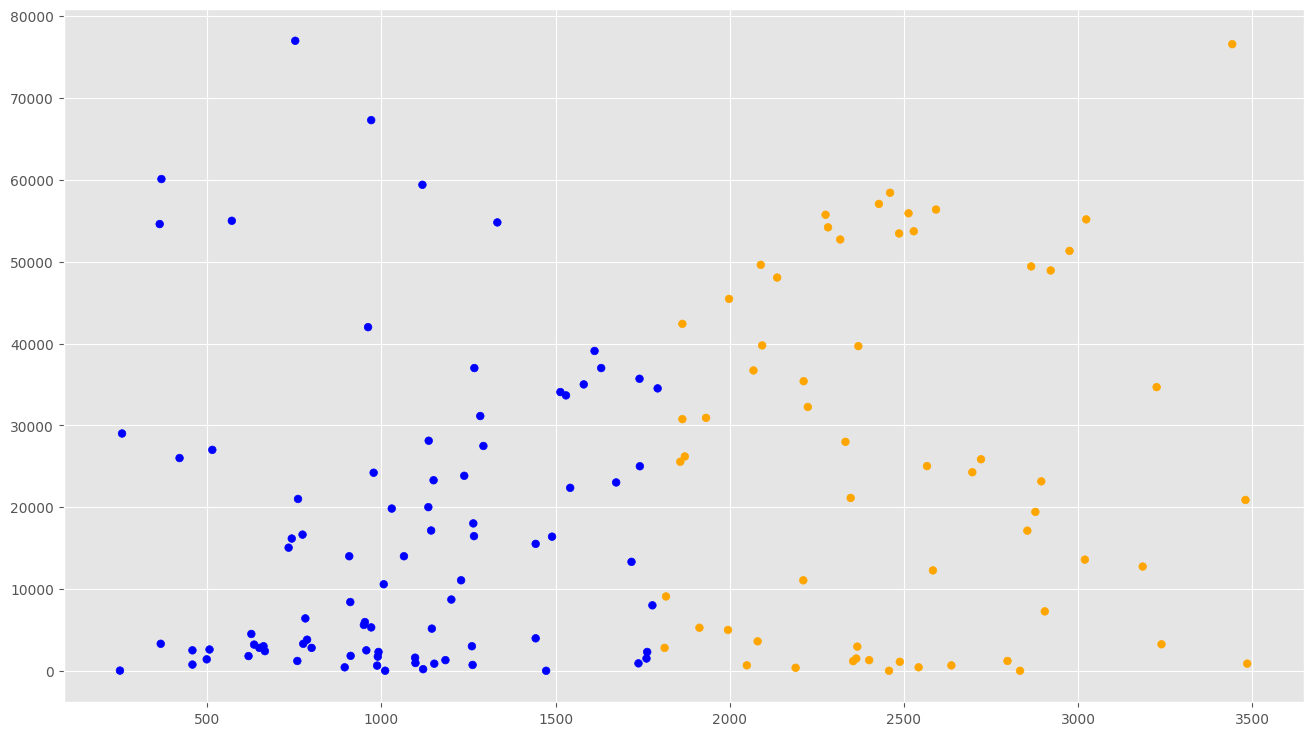

In [ ]:
#Hacemos la gráfica
plt.scatter(f1,f2, c=asignar, s=tamanos[0])
plt.show()

## Preparemos los datos para el modelo

In [ ]:
#Creamos la matriz de features (en este caso es un vector)
X = data_filtrada[['Word count']]

#Creamos el vector de target
y = data_filtrada[['# Shares']]

In [ ]:
data_filtrada.columns

Index(['Title', 'url', 'Word count', '# of Links', '# of comments',
       '# Images video', 'Elapsed days', '# Shares'],
      dtype='object')

In [ ]:
#Separamos los conjuntos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=33)

## Creemos el modelo

In [ ]:
#Instanciamos el modelo
reg = linear_model.LinearRegression()

In [ ]:
reg

LinearRegression()

In [ ]:
#Entrenamos el modelo
reg.fit(X_train,y_train)

LinearRegression()

## Hacemos la predicción

In [ ]:
y_pred = reg.predict(X_test)

## Evaluamos el modelo

recordemos... La ecuación de una recta es:

\begin{align}
\mathbf{y} = \ mx + b
\end{align}

En este caso
- $y$ es el # Share o las veces que se compartió el artículo
- $x$ es la cantidad de palabras del artículo
- $m$ es la pendiente de la recta
- $b$ es el intercepto de la recta

In [ ]:
#Veamos los coeficientes obtenidos
reg.coef_

array([[4.12683849]])

Para cada unidad adicional que aumenta el número de palabras, es decir por cada nueva palabra en un artículo, y => la cantidad de veces que comparto aumenta en 4.12683849 unidades. 

Esto indica una relación positiva entre x (número de palabras) e y (# share), donde un incremento en x se asocia con un aumento en y.

In [ ]:
#Veamos el intercepto
reg.intercept_

array([13267.26347467])

Cuando x es igual a cero, y tiene un valor de 13267.26347467. Esto nos dice que cuando no hay artículo (porque la cantidad de palabras es 0), la cantidad de veces que se comparte es de 13267.26347467.

Entonces la ecuación de nuestro modelo es:

$y = 4.12683849x + 13267.26347467$



Métricas

In [ ]:
mean_squared_error(y_test,y_pred)

384844731.85190916

In [ ]:
r2_score(y_test,y_pred)

0.09870477718415804

Comprobemos
¿Cuántos share voy a obtener con un artículo con 2000 palabras?

In [ ]:
y_dosMil = reg.predict([[2000]])
y_dosMil

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[21520.94045341]])

Grafiquemos nuestro modelo

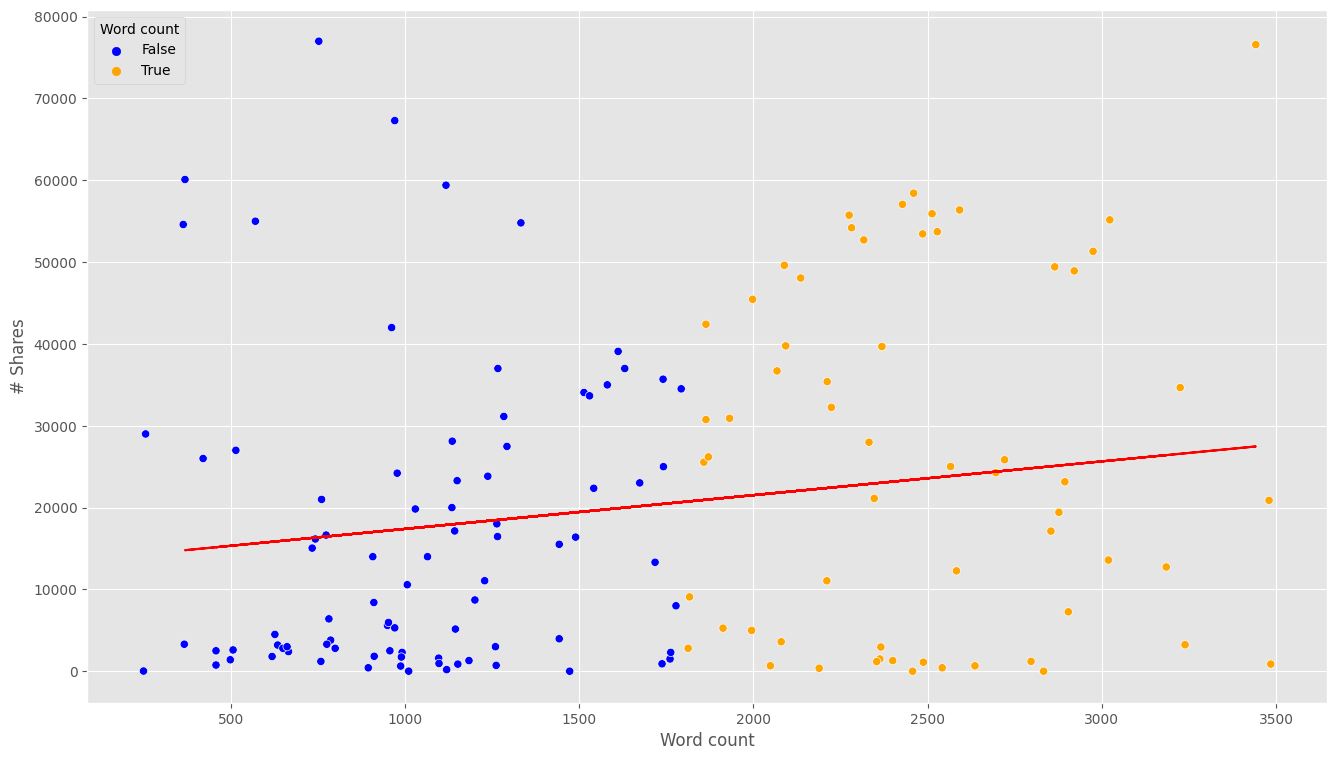

In [ ]:
# Configurar colores para los puntos
palette = {True: 'orange', False: 'blue'}

# Graficar el scatterplot con los colores personalizados
sns.scatterplot(data=data_filtrada, x='Word count', y='# Shares', hue=data_filtrada['Word count'] > media_palabras, palette=palette)

#Graficamos el modelo
plt.plot(X_test.values, y_pred, color='red')

plt.show()

# Regresión lineal múltiple


\begin{align}
\mathbf{y} = \ m_1x_1 + m_2x_2 + ... + m_nx_n + b
\end{align}

Mejoremos el modelo agregando más *features* o variables al modelo

Para poder graficar el modelo en 3D uniremos varias variables en 1 sola (feature engineering)

## Preparemos los datos para el modelo

In [ ]:
data_filtrada.isnull().sum()

Title              0
url               32
Word count         0
# of Links         0
# of comments     27
# Images video     0
Elapsed days       0
# Shares           0
dtype: int64

In [ ]:
suma = (data_filtrada['# of Links'] + data_filtrada['# of comments'].fillna(0) + data_filtrada['# Images video'])

In [ ]:
#Creamos los features
X2 = data_filtrada[['Word count']].copy()

#le adicionamos la columna suma
X2['Suma'] = suma

X2.head()

,Word count,Suma
1,1742,18.0
2,962,7.0
5,761,1.0
7,753,4.0
8,1118,3.0


In [ ]:
y2 = data_filtrada['# Shares']

In [ ]:
#Separamos los conjuntos en entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, random_state=33)

## Creemos el modelo

In [ ]:
#Instanciamos el modelo
reg2 = linear_model.LinearRegression()

In [ ]:
#Entrenamos el modelo
reg2.fit(X_train2,y_train2)

LinearRegression()

## Hacemos la predicción

In [ ]:
## Hacemos la predicción
y_pred2 = reg2.predict(X_test2)

## Evaluamos el modelo

recordemos... La ecuación de una recta es:

\begin{align}
\mathbf{y} = \ m_1x_1 + m_2x_2 + b
\end{align}

En este caso
- $y$ es el # Share o las veces que se compartió el artículo
- $x1$ es la cantidad de palabras del artículo
- $x2$ es la variable suma, donde juntamos varias columnas


In [ ]:
#Veamos los coeficientes obtenidos
reg2.coef_

array([   4.96946197, -550.96065532])

En este caso tenemos 2 coeficientes

Interpretemos los coeficientes:

- Manteniendo todos los features fijos, si incrementamos 1 palabra ('Word count') el número de veces que compartimos ('# Shares') **aumenta** en 4.96946197 (relación positiva)
- Manteniendo todos los features fijos, si incrementamos 1 unidad de la variable suma ('suma') el número de veces que compartimos ('# Shares') **disminuye** en 550.96065532 (relación negativa)


In [ ]:
#Veamos el intercepto
reg2.intercept_

20189.28781474515

Cuando las x's son iguales a cero, el número de shares tiene un valor de20189.29.

Entonces la ecuación de nuestro modelo es:

$y = 4.96946197 x_1 -550.96065532 x_2 + 20189.28781474515$



Métricas

**Mean Squared Error** (MSE) is the mean of the squared errors. **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.


$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [ ]:
mean_squared_error(y_test2,y_pred2)

384149296.2515097

In [ ]:
print('RMSE:', np.sqrt(mean_squared_error(y_test2,y_pred2)))

RMSE: 19599.726943289534


In [ ]:
r2_score(y_test2,y_pred2)

0.10033346723118008

In [ ]:
un_feature = mean_squared_error(y_test,y_pred)
dos_features = mean_squared_error(y_test2,y_pred2)

print(f'MSE con un  feature {un_feature}')
print(f'MSE con dos feature {dos_features}')
print(f'El error bajó {un_feature-dos_features}')

MSE con un  feature 384844731.85190916
MSE con dos feature 384149296.2515097
El error bajó 695435.6003994346


In [ ]:
un_feature_r2 = r2_score(y_test,y_pred)
dos_feature_r2 = r2_score(y_test2,y_pred2)

print(f'r2 con un  feature {un_feature_r2*100}%')
print(f'r2 con dos feature {dos_feature_r2*100}%')
print(f'El error bajó {(dos_feature_r2-un_feature_r2)*100}')

r2 con un  feature 9.870477718415804%
r2 con dos feature 10.033346723118008%
El error bajó 0.1628690047022041


# Otros ejemplos de regresión simple

[Predecir el valor de las casas en California](https://colab.research.google.com/drive/12eLyprdeIc6MI0aNh1fxXZRF56T2Evd9?usp=sharing)

[Predecir la calificación según horas invertidas](https://colab.research.google.com/drive/1C-FrtjRES1BpV2AW9n3KvjPEvmVL4T1A?usp=sharing)